## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# lib manipulation data
import numpy as np
import pandas as pd

# load all functions
from C01_data_collection import *
from C02_visualization import * 
from C03_preprocessing import *
from C04_model_predictions import *

2024-06-03 08:30:24.614083: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 08:30:24.663962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 08:30:24.664024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 08:30:24.664065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 08:30:24.672667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 08:30:24.673383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

- config models

In [2]:
# set random number
import tensorflow as tf
tf.random.set_seed(1234)

In [3]:
# set algorithms
algorithms = "SBi-LSTM"   # fill the value by SBi-LSTM or SBi-GRU
# algorithms = "SBi-GRU"   # fill the value by SBi-LSTM or SBi-GRU

### 1. Data Collections

In [4]:
# load dataset
dataset = data_collection("BTC-USD.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3408 non-null   datetime64[ns]
 1   Open    3408 non-null   float64       
 2   High    3408 non-null   float64       
 3   Low     3408 non-null   float64       
 4   Close   3408 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 133.3 KB


In [5]:
# show dataset
print(dataset.tail())

           Date          Open          High           Low         Close
3403 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
3404 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
3405 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
3406 2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
3407 2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

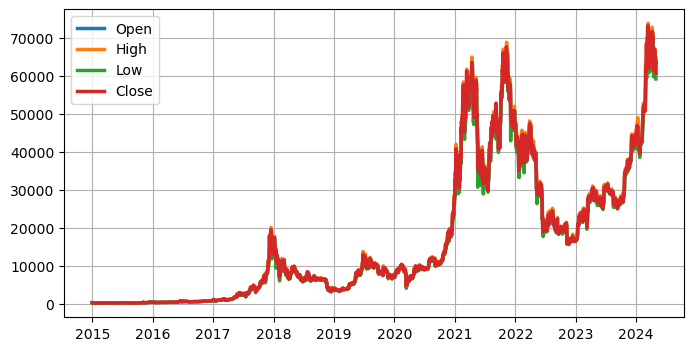

In [6]:
timeseries_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [7]:
# call func preprocessing
x_train, y_train, x_test, y_test = preprocessing(dataset)

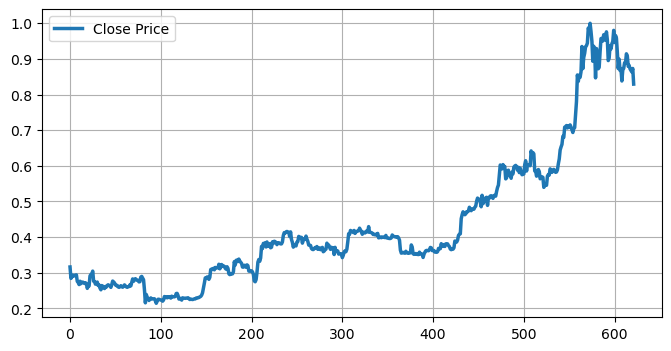

In [8]:
lineplot_matplotlib1(y_test, "Close Price")

### 4 Model Predictions

- training models

In [9]:
history, predictions = get_models(algorithms, x_train, y_train, x_test, y_test)

Epoch 1/50


2024-06-03 08:30:26.427332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-03 08:30:26.428005: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


178/178 [==============================] - 21s 72ms/step - loss: 0.0027 - val_loss: 0.0313
Epoch 2/50
178/178 [==============================] - 9s 52ms/step - loss: 0.0150 - val_loss: 0.0296
Epoch 3/50
178/178 [==============================] - 8s 47ms/step - loss: 0.0139 - val_loss: 0.0196
Epoch 4/50
178/178 [==============================] - 9s 48ms/step - loss: 0.0111 - val_loss: 0.0157
Epoch 5/50
178/178 [==============================] - 8s 47ms/step - loss: 0.0064 - val_loss: 0.0088
Epoch 6/50
178/178 [==============================] - 8s 46ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 7/50
178/178 [==============================] - 8s 47ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/50
178/178 [==============================] - 9s 50ms/step - loss: 0.0012 - val_loss: 7.3844e-04
Epoch 9/50
178/178 [==============================] - 9s 50ms/step - loss: 0.0011 - val_loss: 7.0292e-04
Epoch 10/50
178/178 [==============================] - 8s 45ms/step - loss: 0.0014 - val_loss

- loss function

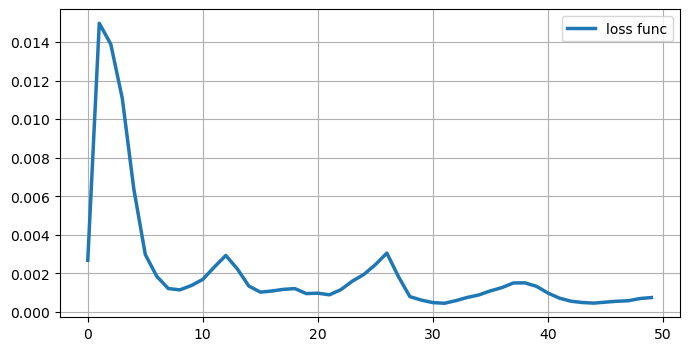

In [10]:
# show loss function
lineplot_matplotlib1(history.history['loss'], "loss func")

In [11]:
mae, rmse, mape = evaluate_models(y_test, predictions)

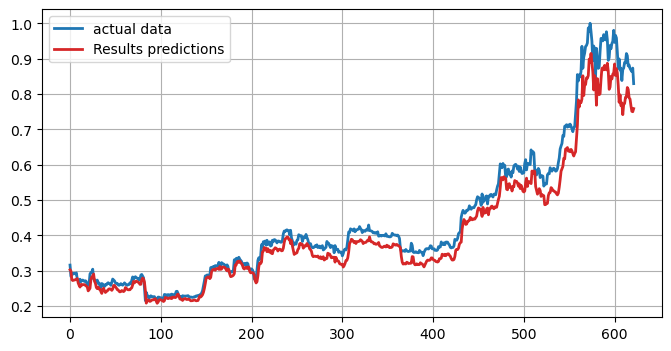

In [16]:
lineplot_matplotlib2(
  line1=y_test,
  label1="actual data",
  line2=predictions,
  label2="Results predictions"
)

- Evaluate Models

In [12]:
mae, rmse, mape = evaluate_models(y_test, predictions)

In [13]:
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("MAE  : "+str(np.round(mae,4)))
print("RMSE : "+str(np.round(rmse,4)))
print("MAPE : "+str(np.round(mape,4)))

Evaluate Models with : SBi-LSTM
-------------------------------
MAE  : 0.034
RMSE : 0.0436
MAPE : 0.0704


In [14]:
mape * 100

7.043095522065769